In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## Cette cellule fournit le dataframe de MSFT(previous) et YHOO(predictor) sur une journée

df_init_previous = pd.read_csv(r'data\2008-01-02-MSFT.O-bbo.csv.gz')
df_init_previous['time'] = pd.to_datetime(df_init_previous.time)
df_init_previous.set_index(df_init_previous.time)
df_init_previous.set_index('time', inplace=True)
df_init_previous = df_init_previous[df_init_previous.index.hour > 11]

df_predictors_init = pd.read_csv(r'data\2008-01-02-YHOO.OQ-bbo.csv.gz')
df_predictors_init['time'] = pd.to_datetime(df_predictors_init.time)
df_predictors_init.set_index(df_predictors_init.time)
df_predictors_init.set_index('time', inplace=True)
df_predictors_init = df_predictors_init[100:]

df_matrix = df_init_previous.join(df_predictors_init, how='outer',
                                  lsuffix=('-previous'), rsuffix='-predictors')



df_matrix = df_matrix.fillna(method='ffill')

df_matrix = df_matrix.drop_duplicates()

df_matrix = df_matrix[50:]

df_matrix = df_matrix[:-100]

#df_matrix

In [4]:
## On prend la log-différence

df_logdiff = np.log(df_matrix) - np.log(df_matrix.shift(1))

#df_logdiff

In [5]:
## On remplace les zéros par les valeurs précédentes non nulles sauf pour bid-price-predictors

df_logdiff = df_logdiff.replace(0, np.nan)

cols_to_fill = df_logdiff.columns.tolist()
cols_to_fill.remove('bid-price-predictors')

df_logdiff[cols_to_fill] = df_logdiff[cols_to_fill].fillna(method='ffill')

df_logdiff['bid-price-predictors'] = df_logdiff['bid-price-predictors'].fillna(0)

#df_logdiff

In [6]:
## On vire les lignes où le bid-price-predictors ne varie pas= 

df_logdiff = df_logdiff[df_logdiff['bid-price-predictors'] != 0]

#df_logdiff

In [7]:
## On ajoute une colonne avec la valeur précédente du bid-price-predictors

prediction_bid_price_predictors = df_logdiff['bid-price-predictors'].shift(-1)

df_logdiff['prediction-bid-price-predictors'] = prediction_bid_price_predictors

#df_logdiff

In [8]:
## On ne regarde qu'à partir des lignes sans NaN

df_logdiff = df_logdiff.dropna()
df_logdiff

,bid-price-previous,bid-volume-previous,ask-price-previous,ask-volume-previous,bid-price-predictors,bid-volume-predictors,ask-price-predictors,ask-volume-predictors,prediction-bid-price-predictors
time,,,,,,,,,
2008-01-02 13:04:16.601999616,-0.000841,2.302585,0.001400,0.182322,-0.001256,1.609438,-0.002076,2.995732,0.001256
2008-01-02 13:04:19.351999744,-0.000841,2.302585,0.001400,0.182322,0.001256,-1.609438,-0.000416,-0.693147,-0.001256
2008-01-02 13:04:24.797000192,-0.000841,2.302585,0.001400,0.182322,-0.001256,1.609438,-0.002081,0.405465,0.001256
2008-01-02 13:04:31.696000256,-0.000841,2.302585,0.001400,0.182322,0.001256,1.609438,-0.002081,0.405465,-0.000837
2008-01-02 13:05:02.976999936,0.000841,0.223144,0.001400,-0.182322,-0.000837,-1.791759,0.000417,-0.356675,-0.000419
...,...,...,...,...,...,...,...,...,...
2008-01-02 21:03:23.710000128,0.000284,1.421386,-0.000283,-0.182322,-0.001267,-1.791759,0.001265,3.577948,0.001688
2008-01-02 21:06:00.636999936,-0.000568,-0.470004,-0.000851,-2.954910,0.001688,-1.791759,0.001265,-0.057487,0.000422
2008-01-02 21:06:50.303000320,-0.000284,-3.427515,0.000851,2.954910,0.000422,3.401197,0.001265,-0.057487,-0.002110


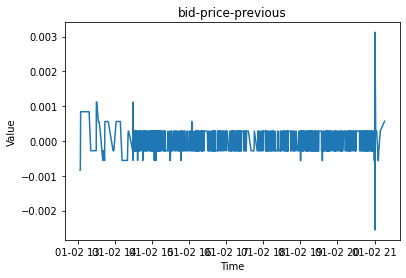

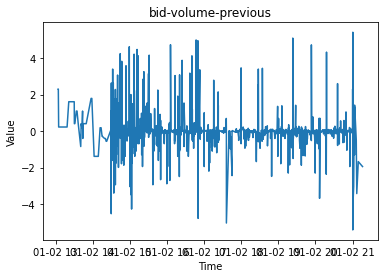

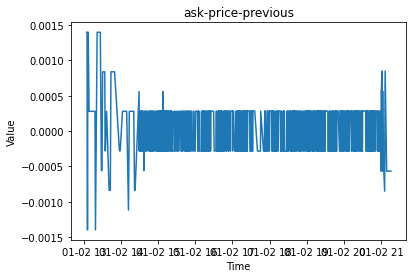

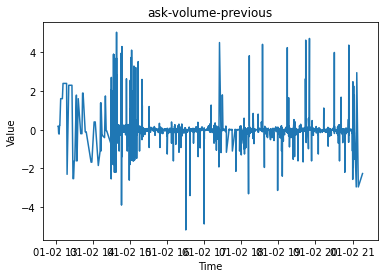

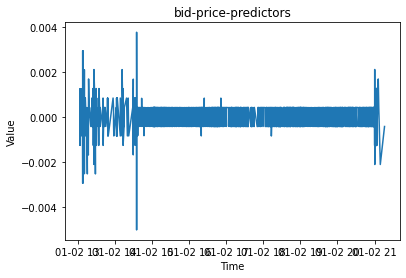

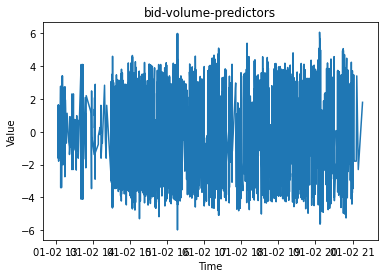

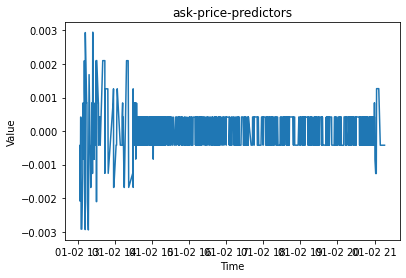

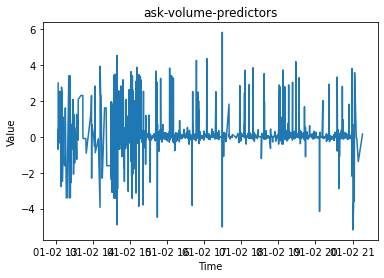

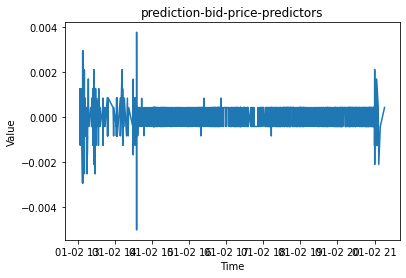

In [9]:
## Plot les différents paramètres

import matplotlib.pyplot as plt

df_order_books=df_logdiff


for col in df_order_books.columns:
    plt.plot(df_order_books.index, df_order_books[col])
    plt.title(col)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()



In [10]:
df_order_books

,bid-price-previous,bid-volume-previous,ask-price-previous,ask-volume-previous,bid-price-predictors,bid-volume-predictors,ask-price-predictors,ask-volume-predictors,prediction-bid-price-predictors
time,,,,,,,,,
2008-01-02 13:04:16.601999616,-0.000841,2.302585,0.001400,0.182322,-0.001256,1.609438,-0.002076,2.995732,0.001256
2008-01-02 13:04:19.351999744,-0.000841,2.302585,0.001400,0.182322,0.001256,-1.609438,-0.000416,-0.693147,-0.001256
2008-01-02 13:04:24.797000192,-0.000841,2.302585,0.001400,0.182322,-0.001256,1.609438,-0.002081,0.405465,0.001256
2008-01-02 13:04:31.696000256,-0.000841,2.302585,0.001400,0.182322,0.001256,1.609438,-0.002081,0.405465,-0.000837
2008-01-02 13:05:02.976999936,0.000841,0.223144,0.001400,-0.182322,-0.000837,-1.791759,0.000417,-0.356675,-0.000419
...,...,...,...,...,...,...,...,...,...
2008-01-02 21:03:23.710000128,0.000284,1.421386,-0.000283,-0.182322,-0.001267,-1.791759,0.001265,3.577948,0.001688
2008-01-02 21:06:00.636999936,-0.000568,-0.470004,-0.000851,-2.954910,0.001688,-1.791759,0.001265,-0.057487,0.000422
2008-01-02 21:06:50.303000320,-0.000284,-3.427515,0.000851,2.954910,0.000422,3.401197,0.001265,-0.057487,-0.002110
